In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

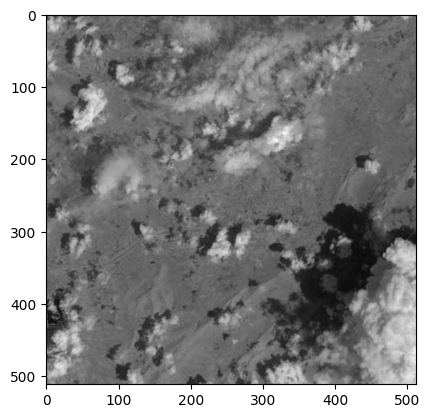

In [56]:
img_path = 'img/test2.jpg'
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
plt.show()

### OSTU法（大津法）

函数实现

In [57]:
def otsu(gray_img):
    h = gray_img.shape[0]
    w = gray_img.shape[1]
    threshold_t = 0
    max_g = 0
    
    # 遍历每一个灰度级
    for t in range(255):
        n0 = gray_img[np.where(gray_img < t)]
        n1 = gray_img[np.where(gray_img >= t)]
        w0 = len(n0) / (h * w)
        w1 = len(n1) / (h * w)
        u0 = np.mean(n0) if len(n0) > 0 else 0.
        u1 = np.mean(n1) if len(n0) > 0 else 0.
        
        g = w0 * w1 * (u0 - u1) ** 2
        if g > max_g:
            max_g = g
            threshold_t = t
    gray_img[gray_img < threshold_t] = 0
    gray_img[gray_img >= threshold_t] = 255
    return gray_img

### 迭代法

函数实现

In [58]:
def global_ths(gray_img):
    threshold_t = 127

    while True:
        t0 = gray_img[np.where(gray_img < threshold_t)]
        t1 = gray_img[np.where(gray_img >= threshold_t)]
        t=(np.mean(t0)+np.mean(t1))/2
        if abs(t-threshold_t)<0.1:
            break
        else:
            threshold_t=t

    gray_img[gray_img < threshold_t] = 0
    gray_img[gray_img >= threshold_t] = 255
    return gray_img

### 结果展示

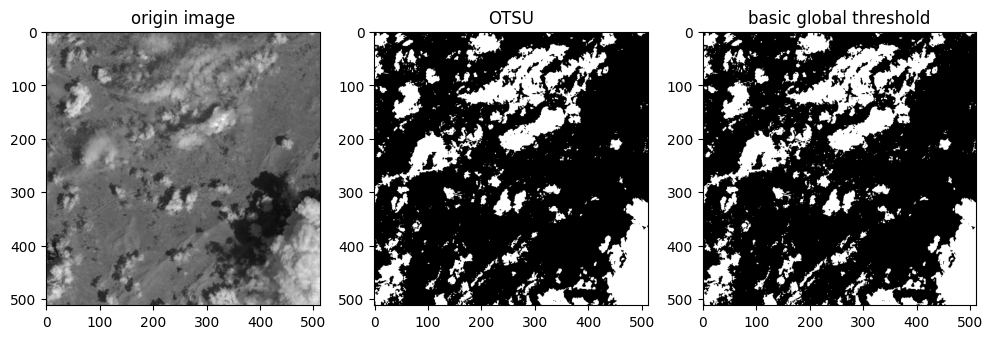

In [59]:
height,width= img.shape[:2] 
img_otsu=np.zeros((height,width))
img_global_ths=np.zeros((height,width))

img_otsu=otsu(img.copy())
img_global_ths=global_ths(img.copy())

plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("origin image")
plt.subplot(1,3,2)
plt.imshow(img_otsu,cmap='gray')
plt.title('OTSU')
plt.subplot(1,3,3)
plt.imshow(img_global_ths,cmap='gray')
plt.title('basic global threshold')
plt.show()